# Animal Track Classification With CNN
### ITCS 4156, Spring 2020
#### Sara Ashcraft, James Black, Debabrata Das, Bonaventure Raj

### Objective
We will train a CNN to classify animal tracks based on the taxonomic rank of order. If successful, our results would be useful for wildlife conservation. We will be referencing work done by individuals from the Dogs vs. Cats Kaggle challenge linked below:

https://www.kaggle.com/c/dogs-vs-cats

This will allow us to jumpstart our project by building off of others' work on a similar problem. Let's start by preparing our data.

### Data
Our dataset will be composed of images of animal tracks. We collected this data by web scraping the following site:

http://www.naturetracking.com/mammal-tracks/#/

After collecting the data, we grouped the images by the order of the species that the track images belonged to. We chose to classify by order, as opposed to more specific classifications like family, genus, or species, because of the amount of data available. Grouping by a more specific classification would mean that some classes would not have enough data.

In [16]:
import numpy as np
import pandas as pd
from copy import deepcopy as copy
import tensorflow as tf
from tensorflow import keras
import os

# Load data
path = os.listdir("./images")
labels = []
images = []

for folder in path:
    order_path = os.listdir("./images/" + folder)
    for subfolder in order_path:
        image_path = os.listdir("./images/" + folder + "/" + subfolder)
        for image in image_path:
            labels.append(folder)
            images.append(image)
            
df = pd.DataFrame({'image':images, 'order':labels})
df

,image,order
0,0.thumbnail,Artiodactyla
1,1.thumbnail,Artiodactyla
2,2.thumbnail,Artiodactyla
3,3.thumbnail,Artiodactyla
4,4.thumbnail,Artiodactyla
...,...,...
636,2.thumbnail,Rodentia
637,3.thumbnail,Rodentia
638,4.thumbnail,Rodentia
639,5.thumbnail,Rodentia


Let us take a look at a random sample of our data in order to determine what preprocessing should be done. First, we will want to separate our images and their labels. Then, we will plot.

TypeError: Image data of dtype object cannot be converted to float

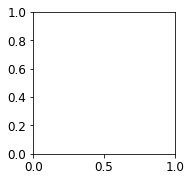

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Separate images and labels
X = df[['image']].copy()
y = df[['order']].copy()

# Random indexes
N = df.shape[0]
randIdxs = np.random.randint(N, size=10)

# Visualize
plt.figure(figsize=(12,12))
nr = int(np.ceil(np.sqrt(randIdxs.size)))
        
for i in range(randIdxs.size):
    plt.subplot(nr, nr, 1 + i)
    plt.imshow(X.iloc[randIdxs[i]], cmap="binary")
    plt.title(y.iloc[randIdxs[i]])
    plt.axis("off")
plt.tight_layout()

In [ ]:
# Preprocess

# Normalize

# Visualize

### References
https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification